# Coin change

In [29]:
# Greedy solution
# add the largest possible amount of the biggest coin whose value is < target
# iterate backwards over the coin-set (assuming coins are sorted in ascending order)
# subtract the added amount from target -> break when target == 0
def select_coins_greedily(coins, target):
    selected_coins = []

    for i in range(len(coins) - 1, -1, -1):
        num_coin_i = target // coins[i]
        for _ in range(num_coin_i):
            selected_coins.append(coins[i])
        
        target -= num_coin_i * coins[i]
        if target == 0:
            break
    
    return selected_coins

# DP solution
# find the minimum number of coins needed for each amount <= target, then return the final value
# initialize all coin counts as inf, then # iterate thorugh the coins and check if using it => lower number of coins
#by considering the number of coins needed for the remainder (i - coin) and adding one (for the current coin being used).
def select_coins_dp(coins, target):
    min_coins = [float('inf')] * (target + 1)
    min_coins[0] = 0  # Base case; evaluates this here to simplify the loop.

    for i in range(1, target + 1):
        for coin in coins:

            if coin <= i:
                remainder = i - coin

                if min_coins[remainder] + 1 < min_coins[i]:
                    min_coins[i] = min_coins[remainder] + 1

    return min_coins[target]
 

In [30]:
coins = [1, 5, 10, 20]
target = 67
print(f"Minimum number of coins required for {target}: {select_coins_dp(coins, target)}")

greedily_selected_coins = select_coins_greedily(coins, target)
print(f"Minimum number of coins required: {len(greedily_selected_coins )}")
print(f"Optimal collection of coins: {greedily_selected_coins}")

Minimum number of coins required for 67: 6
Minimum number of coins required: 6
Optimal collection of coins: [20, 20, 20, 5, 1, 1]


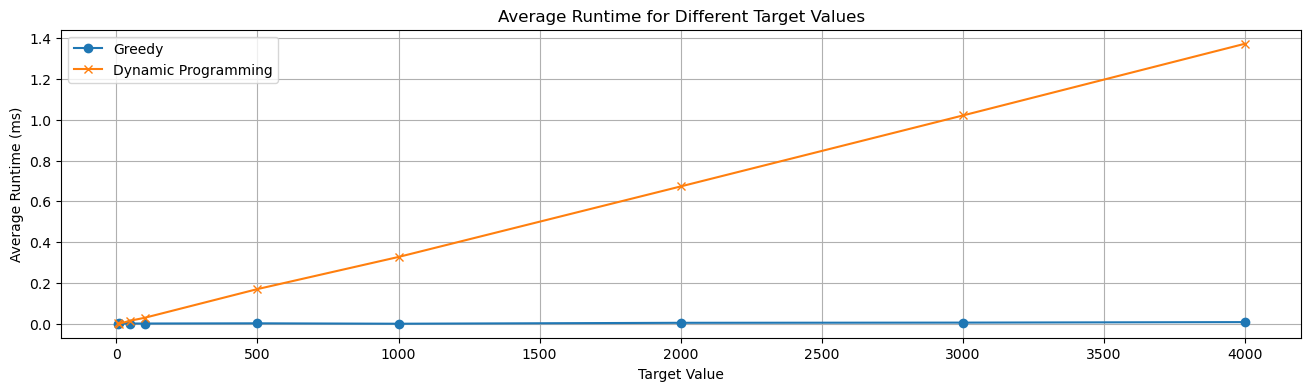

In [31]:
import time
import matplotlib.pyplot as plt


def time_function(target, callback):
    start = time.time()
    callback(coins, target)
    end = time.time()
    return end - start

targets = [5, 10, 20, 50, 80, 100, 150, 207]; 
num_runs = 1000
average_runtimes_greedy = []
average_runtimes_dp = []

for target in targets:
    total_time_greedy = 0
    total_time_dp = 0
    
    for _ in range(num_runs):
        total_time_greedy += time_function(target, select_coins_greedily)
        total_time_dp += time_function(target, select_coins_dp)
    
    average_runtimes_greedy.append((total_time_greedy / num_runs) * 1000)
    average_runtimes_dp.append((total_time_dp / num_runs) * 1000)

# Plotting
plt.plot(targets, average_runtimes_greedy, marker='o', label='Greedy')
plt.plot(targets, average_runtimes_dp, marker='x', label='Dynamic Programming')
plt.xlabel('Target Value')
plt.ylabel('Average Runtime (ms)')
plt.title('Average Runtime for Different Target Values')
plt.legend()
plt.grid(True)
plt.show()